In [ ]:
import json
import matplotlib.pyplot as plt
import numpy as np

with open('QMProt/QMProt.json', 'r') as file:
    data = json.load(file)


In [ ]:
import pandas as pd

amino_acids_data = []
for amino_acid in data['amino_acids']:
    amino_acids_data.append({
        'NAME': amino_acid['name'],
        'FORMULA': amino_acid['mf'],
        'NUMBER OF ELECTRONS': amino_acid['n_electrons'],
        'NUMBER OF ORBITALS': amino_acid['n_orbitals'],
        'NUMBER OF QUBITS': amino_acid['n_qubits'],
        'NUMBER OF COEFFICIENTS': amino_acid['n_coefficients']})
for amino_acid in data['other_molecules']:
        amino_acids_data.append({
        'NAME': amino_acid['name'],
        'FORMULA': amino_acid['mf'],
        'NUMBER OF ELECTRONS': amino_acid['n_electrons'],
        'NUMBER OF ORBITALS': amino_acid['n_orbitals'],
        'NUMBER OF QUBITS': amino_acid['n_qubits'],
        'NUMBER OF COEFFICIENTS': amino_acid['n_coefficients']
    })

df = pd.DataFrame(amino_acids_data)

df

,NAME,FORMULA,NUMBER OF ELECTRONS,NUMBER OF ORBITALS,NUMBER OF QUBITS,NUMBER OF COEFFICIENTS
0,histidine,C6H9N3O2,82,64,128,23831261
1,leucine,C6H13NO2,72,58,116,16200242
2,isoleucine,C6H13NO2,72,58,116,16379995
3,lysine,C6H14N2O2,80,64,128,23906497
4,methionine,C5H11NO2S,80,60,120,17802421
5,phenylalanine,C9H11NO2,88,71,142,36125918
6,threonine,C4H9NO3,64,49,94,8355908
7,tryptophan,C11H12N2O2,108,87,159,92412988
8,valine,C5H11NO2,64,51,102,9819598
9,arginine,C6H14N4O2,94,74,114,41609123


In [7]:
def analyze_molecules(molecules):
    num_molecules = len(molecules)
    energies = [mol["energy"] for mol in molecules]
    num_atoms = [mol["n_atoms"] for mol in molecules]
    names = [mol.get("aa", mol.get("name", "Unknown")) for mol in molecules]
    num_qubits = [mol["n_qubits"] for mol in molecules]

    return {
        "num_molecules": num_molecules,
        "energies": energies,
        "num_atoms": num_atoms,
        "names": names,
        "num_qubits": num_qubits,
    }

amino_acids_analysis = analyze_molecules(data['amino_acids'])
other_molecules_analysis = analyze_molecules(data['other_molecules'])

total_analysis = {
    "num_molecules": amino_acids_analysis["num_molecules"] + other_molecules_analysis["num_molecules"],
    "energies": amino_acids_analysis["energies"] + other_molecules_analysis["energies"],
    "num_atoms": amino_acids_analysis["num_atoms"] + other_molecules_analysis["num_atoms"],
    "names": amino_acids_analysis["names"] + other_molecules_analysis["names"],
    "num_qubits": amino_acids_analysis["num_qubits"] + other_molecules_analysis["num_qubits"]
}

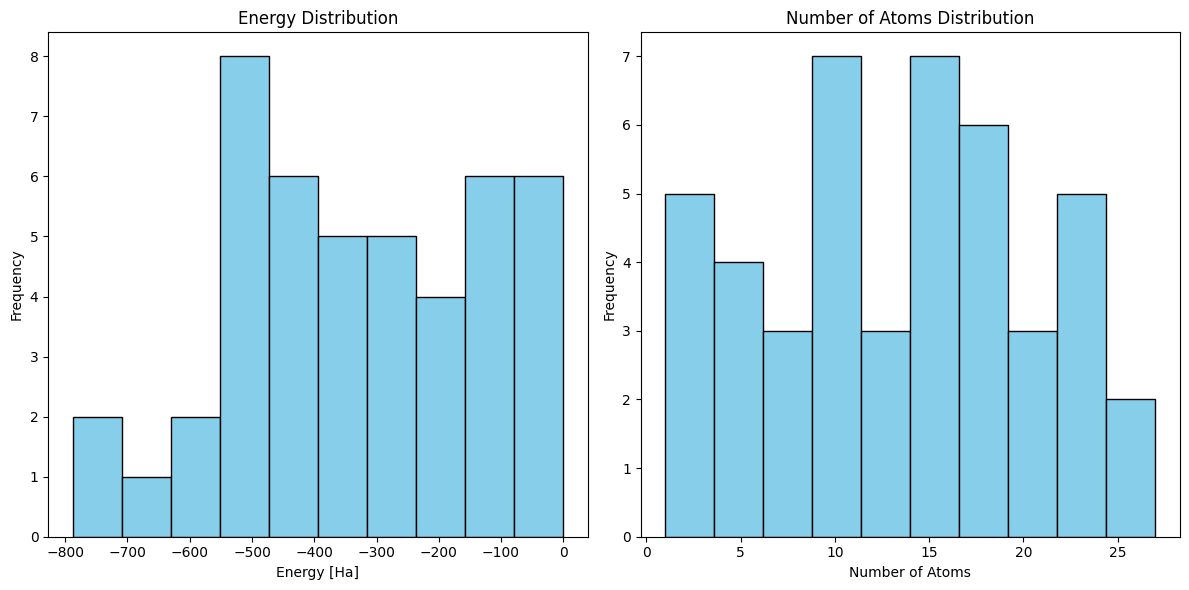

Número total de moléculas: 45
Rango de energías: -788.021 a -0.467
Promedio de átomos por molécula: 13.33


In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(total_analysis["energies"], bins=10, color='skyblue', edgecolor='black')
plt.title("Energy Distribution")
plt.xlabel("Energy [Ha]")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
plt.hist(total_analysis["num_atoms"], bins=10, color='skyblue', edgecolor='black')
plt.title("Number of Atoms Distribution")
plt.xlabel("Number of Atoms")
plt.ylabel("Frequency")


plt.tight_layout()
plt.show()

print(f"Número total de moléculas: {total_analysis['num_molecules']}")
print(f"Rango de energías: {min(total_analysis['energies']):.3f} a {max(total_analysis['energies']):.3f}")
print(f"Promedio de átomos por molécula: {np.mean(total_analysis['num_atoms']):.2f}")


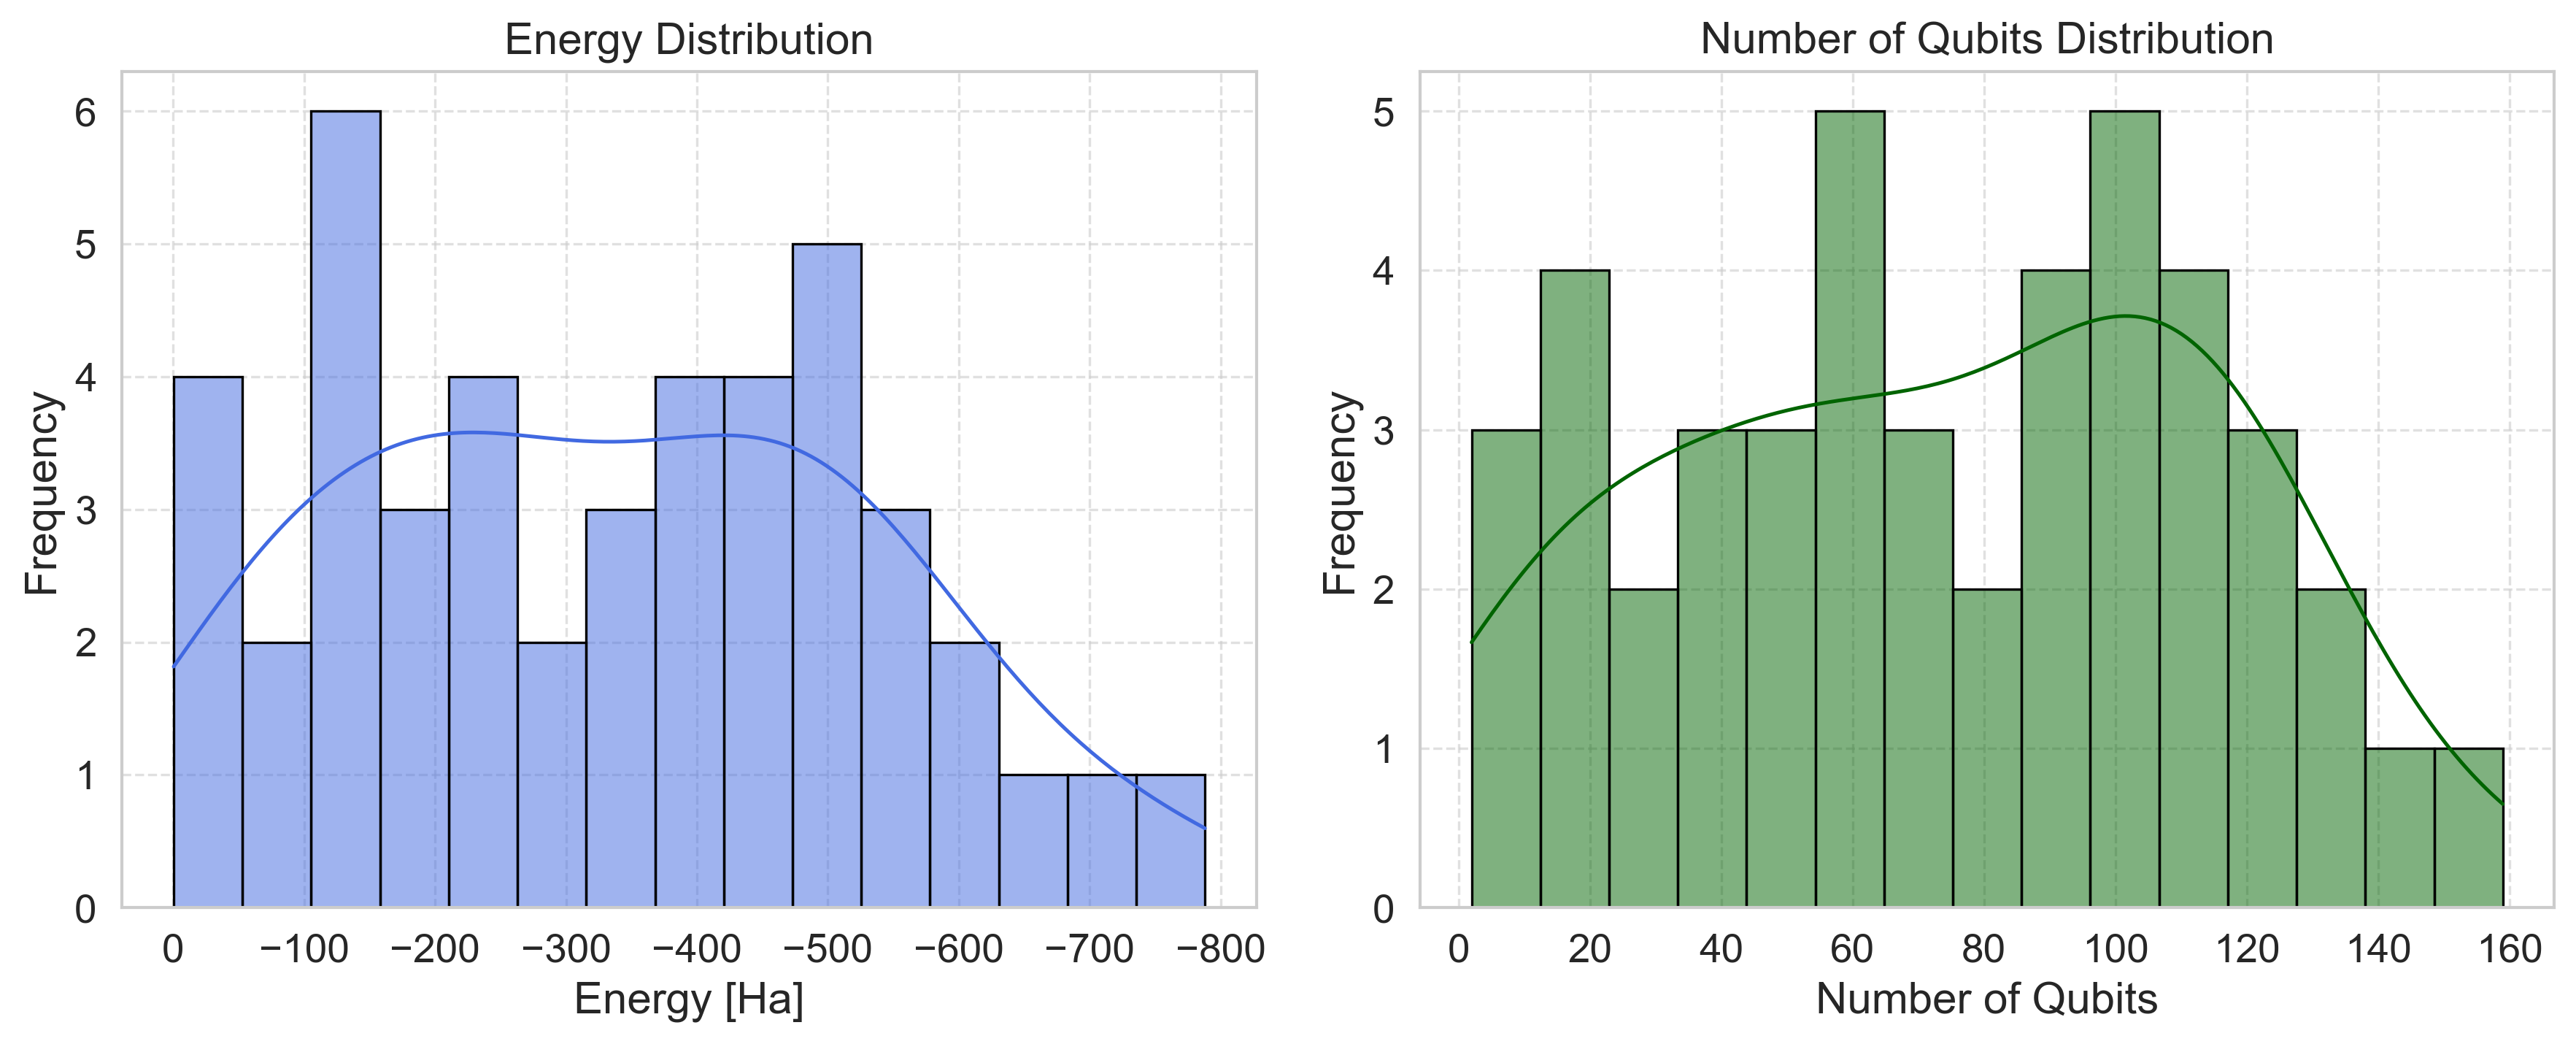

Número total de moléculas: 45
Rango de energías: -788.021 a -0.467
Promedio de átomos por molécula: 13.33


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_context("paper", font_scale=1.5) 
sns.set_style("whitegrid") 

fig, axes = plt.subplots(1, 2, figsize=(12, 5), dpi=300)  

sns.histplot(total_analysis["energies"], bins=15, kde=True, color='royalblue', edgecolor='black', ax=axes[0])
axes[0].set_title("Energy Distribution")
axes[0].set_xlabel("Energy [Ha]")
axes[0].set_ylabel("Frequency")
axes[0].grid(True, linestyle="--", alpha=0.6)
axes[0].invert_xaxis() 

sns.histplot(total_analysis["num_qubits"], bins=15, kde=True, color='darkgreen', edgecolor='black', ax=axes[1])
axes[1].set_title("Number of Qubits Distribution")
axes[1].set_xlabel("Number of Qubits")
axes[1].set_ylabel("Frequency")
axes[1].grid(True, linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()

print(f"Número total de moléculas: {total_analysis['num_molecules']}")
print(f"Rango de energías: {min(total_analysis['energies']):.3f} a {max(total_analysis['energies']):.3f}")
print(f"Promedio de átomos por molécula: {np.mean(total_analysis['num_atoms']):.2f}")


In [6]:
np.max(total_analysis['num_atoms'])

27

In [7]:

amino_acids = data['amino_acids']
other_molecules = data['other_molecules_and_fragments']

print(f"Total de aminoácidos: {len(amino_acids)}")
print(f"Total de otras moléculas y fragmentos: {len(other_molecules)}")


Total de aminoácidos: 20
Total de otras moléculas y fragmentos: 25


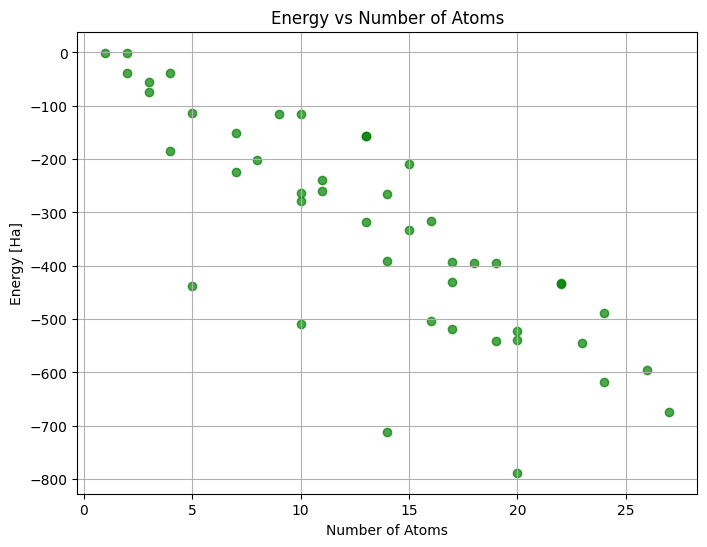

In [ ]:
n_atoms = [mol['n_atoms'] for mol in amino_acids + other_molecules]

plt.figure(figsize=(8, 6))
plt.scatter(n_atoms, energies, color='green', alpha=0.7)
plt.title('Energy vs Number of Atoms')
plt.xlabel('Number of Atoms')
plt.ylabel('Energy [Ha]')
plt.grid(True)
plt.show()


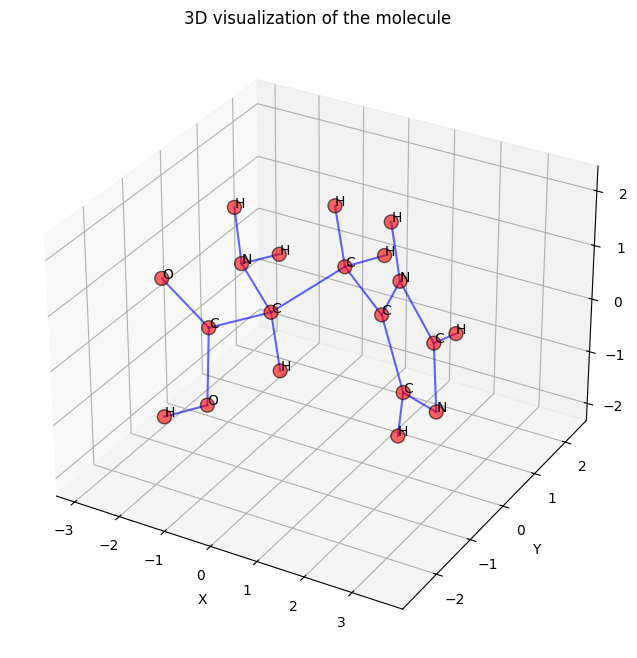

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

coordinates = amino_acids[0]['coordinates']

atoms = [atom['atom'] for atom in coordinates]
x = [atom['x'] for atom in coordinates]
y = [atom['y'] for atom in coordinates]
z = [atom['z'] for atom in coordinates]

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c='red', s=100, alpha=0.6, edgecolor='k')

threshold = 1.6  
for i in range(len(x)):
    for j in range(i + 1, len(x)):  
        distance = np.sqrt((x[i] - x[j])**2 + (y[i] - y[j])**2 + (z[i] - z[j])**2)
        if distance < threshold:
            ax.plot([x[i], x[j]], [y[i], y[j]], [z[i], z[j]], color='blue', alpha=0.6)


for i, atom in enumerate(atoms):
    ax.text(x[i], y[i], z[i], atom, fontsize=10)

ax.set_title('3D visualization of the molecule')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()
